<a href="https://colab.research.google.com/github/drfperez/openair/blob/main/Mitjanes_diaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving martorell9124.csv to martorell9124 (2).csv


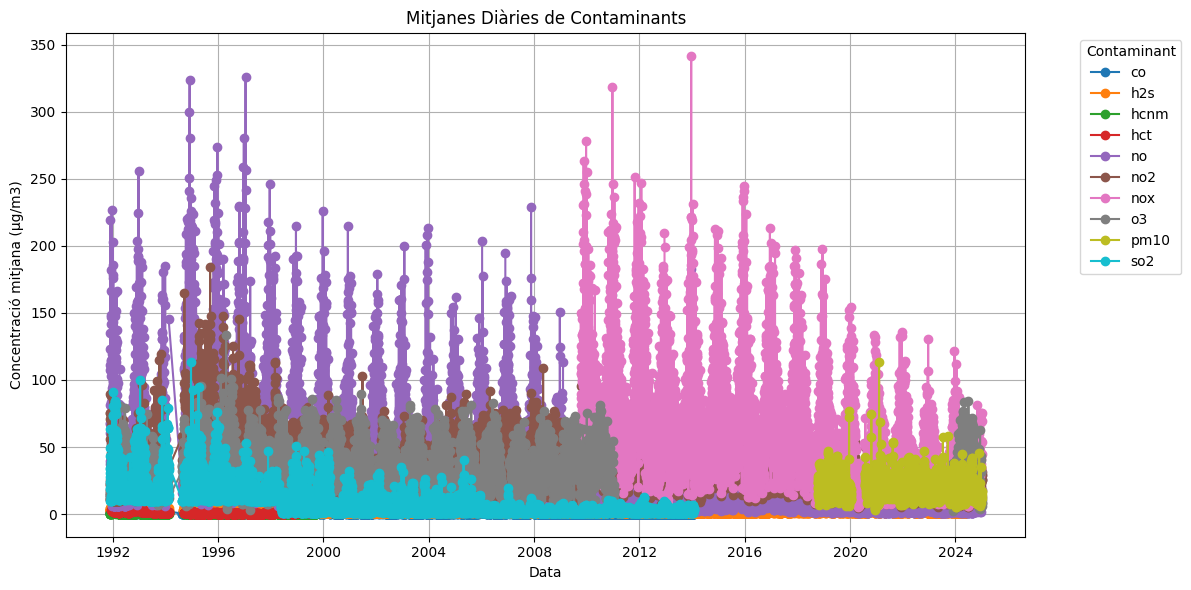

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:

# Importa les llibreries necessàries
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# 📤 PUJA EL FITXER CSV
uploaded = files.upload()

# Llegeix el fitxer CSV pujat
for filename in uploaded.keys():
    df = pd.read_csv(filename)

# 🔄 Converteix les hores a numèric i gestiona valors buits com NaN
cols_hores = [f'h{i:02d}' for i in range(1, 25)]
df[cols_hores] = df[cols_hores].apply(pd.to_numeric, errors='coerce')

# Converteix la data a tipus 'datetime' (yyyy-mm-dd)
df['data'] = pd.to_datetime(df['data'], errors='coerce').dt.date

# Converteix els contaminants a minúscules
df['contaminant'] = df['contaminant'].str.lower()

# 🧮 Calcula la mitjana diària per contaminant
df_melted = df.melt(id_vars=['data', 'contaminant'], value_vars=cols_hores,
                    var_name='hora', value_name='valor')

# Converteix 'valor' a numèric per garantir que es gestionin correctament les hores
df_melted['valor'] = pd.to_numeric(df_melted['valor'], errors='coerce')

# Filtra valors extrems (opcional, ajusta el límit segons sigui necessari)
df_melted = df_melted[df_melted['valor'] < 500]

# Agrupa per data i contaminant per calcular la mitjana diària
df_mitjanes = df_melted.groupby(['data', 'contaminant'])['valor'].mean().unstack()

# Arrodoneix els resultats a 2 decimals
df_mitjanes = df_mitjanes.round(2)

# 📝 Dibuixa el gràfic de les mitjanes diàries (només dades numèriques)
plt.figure(figsize=(12, 6))
for contaminant in df_mitjanes.columns:
    plt.plot(df_mitjanes.index, df_mitjanes[contaminant], marker='o', label=contaminant)

plt.title('Mitjanes Diàries de Contaminants')
plt.xlabel('Data')
plt.ylabel('Concentració mitjana (µg/m3)')
plt.legend(title='Contaminant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Prepara el DataFrame per exportar-lo com CSV
df_mitjanes_export = df_mitjanes.reset_index()
df_mitjanes_export.rename(columns={'data': 'date'}, inplace=True)

# 📝 Guarda el nou CSV amb les mitjanes diàries
output_filename = 'mitjanes_diaries.csv'
df_mitjanes_export.to_csv(output_filename, index=False)

# 📥 Descarrega el nou CSV
files.download(output_filename)